# SIRD Nazioni

Panoramica SIRD di tutte le nazioni.

> Max Pierini

***

Legenda:

- Cumulativi e Variazioni
    - Rosso: deceduti
    - Verde: guariti
    - Blu: positivi

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML

In [2]:
T = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
    index_col=["Country/Region", "Province/State"]
)
R = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",
    index_col=["Country/Region", "Province/State"]
)
D = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",
    index_col=["Country/Region", "Province/State"]
)

In [3]:
print(f"LAST UPDATE: {pd.to_datetime(T[T.columns[-1]].name).date()}")

LAST UPDATE: 2020-11-28


In [4]:
countries = T.index.get_level_values("Country/Region").unique()
days = T.columns[2:]

print(f"COUNTRIES: {countries.size}")
print(f"DAYS: {days.size} (from {pd.to_datetime(days[0]).date()})")

COUNTRIES: 191
DAYS: 312 (from 2020-01-22)


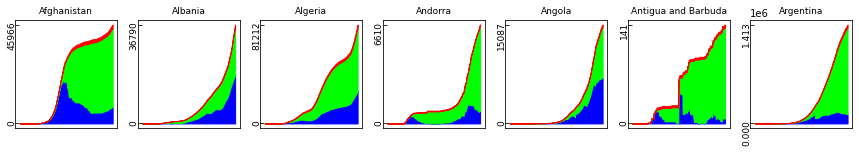

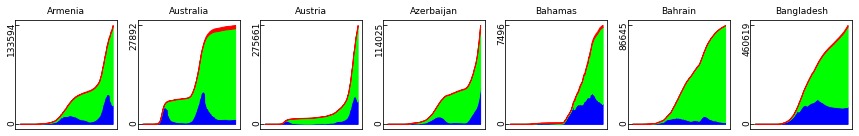

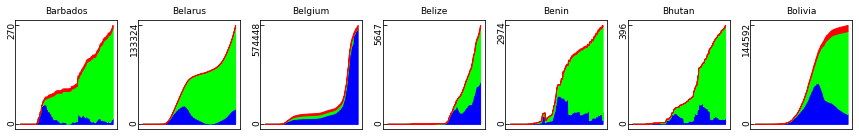

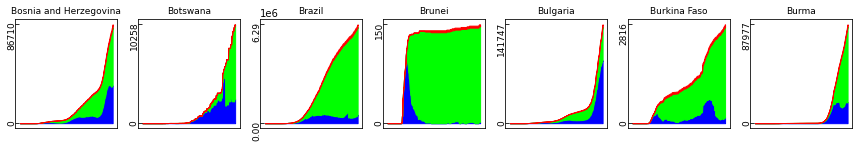

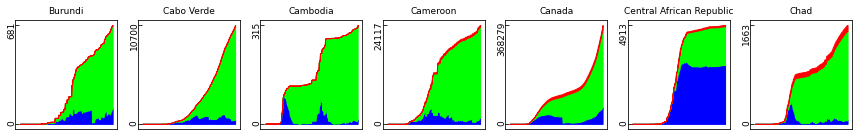

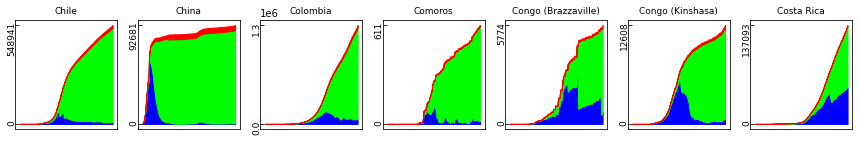

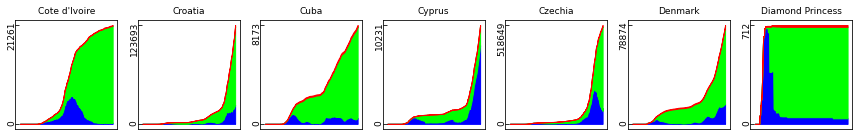

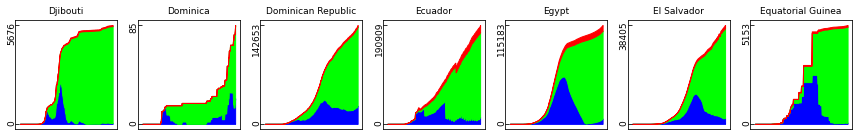

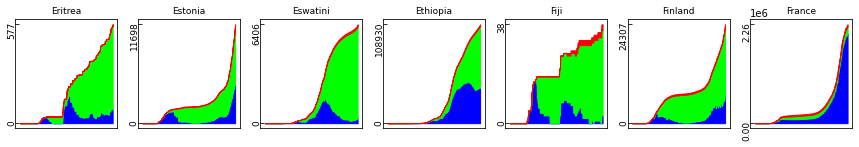

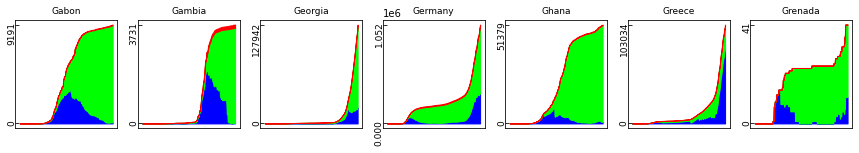

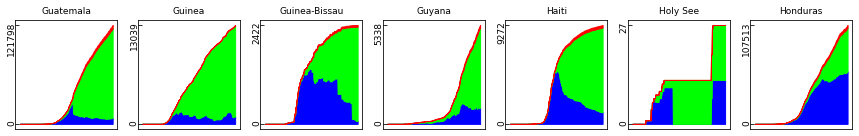

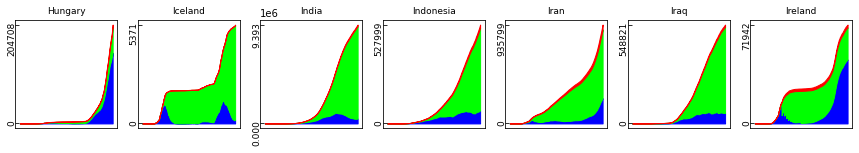

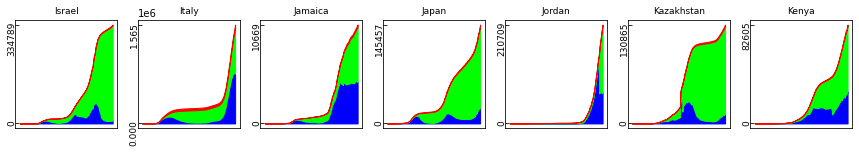

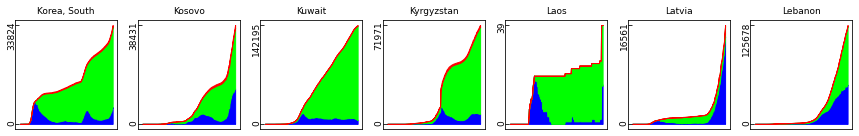

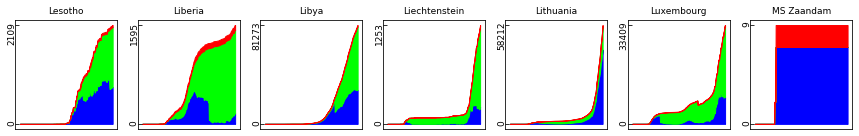

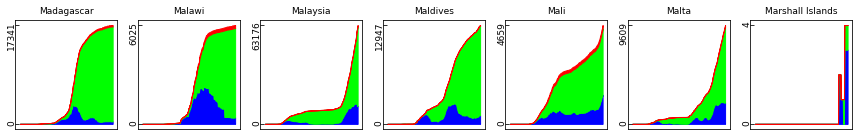

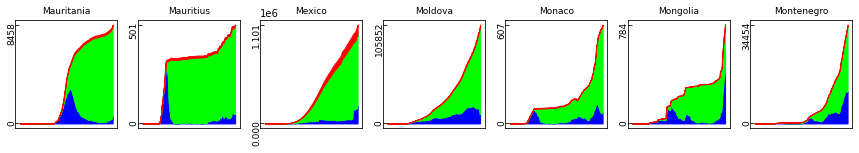

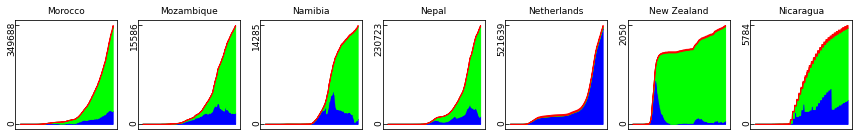

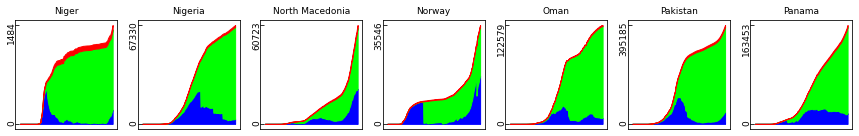

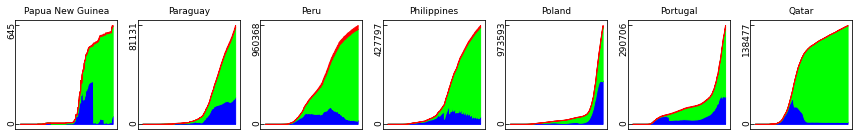

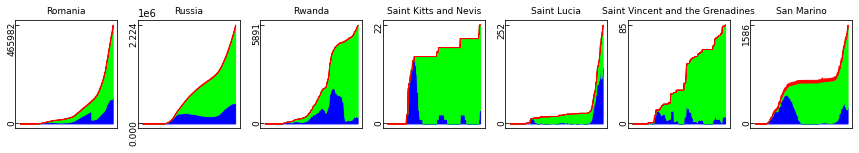

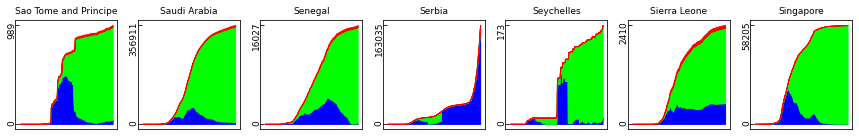

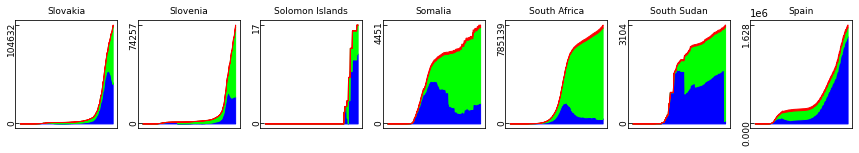

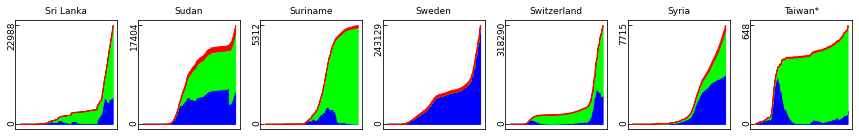

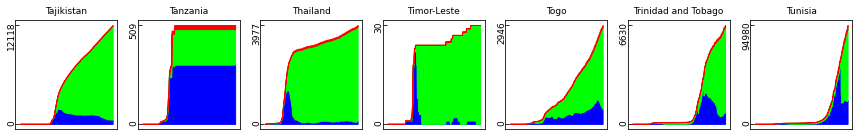

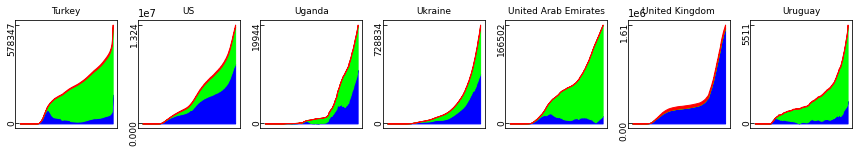

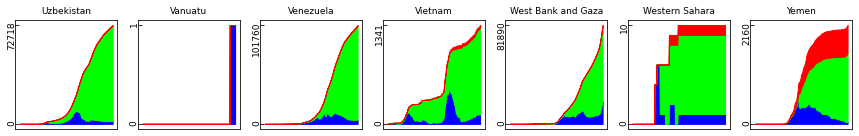

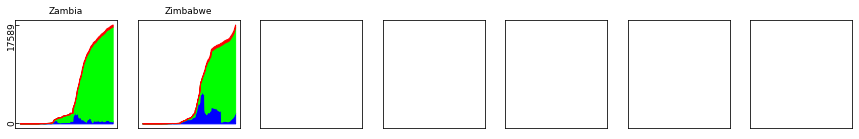

In [5]:
ncols = 7
nrows = int(np.ceil(countries.size / ncols))

sizex = 15
sizey = 2

done = []
for country in sorted(countries):
    if country in done:
        continue
    j = len(done)
    if not j % ncols:
        fig, ax = plt.subplots(1, ncols, figsize=(sizex, sizey))
    t = T[days].loc[country].sum(axis=0)
    r = R[days].loc[country].sum(axis=0)
    d = D[days].loc[country].sum(axis=0)
    i = t - (r + d)
    ax.flat[j%ncols].fill_between(t.index, 0, i, color="blue")
    ax.flat[j%ncols].fill_between(t.index, i, r+i, color="#00ff00")
    ax.flat[j%ncols].fill_between(t.index, r+i, t, color="red")
    ax.flat[j%ncols].set_xticks([])
    ax.flat[j%ncols].set_yticks([])
    ax.flat[j%ncols].set_title(country, fontsize=9)
    done.append(country)
    ax.flat[j%ncols].set_yticks([0, t.max()])
    ax.flat[j%ncols].tick_params(direction='in', labelsize=9, rotation=90, pad=-1)
    if j % ncols == ncols-1:
        fig.set_facecolor('w'); plt.show();
        plt.close(fig=fig)
if j % ncols < ncols-1:
    for i in np.arange(j % ncols, ncols):
        ax.flat[i].set_xticks([])
        ax.flat[i].set_yticks([])
    fig.set_facecolor('w')
    plt.show()

In [6]:
df_dic = {
    "country": [],
    "TOTAL": [],
    "positive": [],
    "recovered": [],
    "deaths": []
}

for country in sorted(countries):
    t = T[days].loc[country].sum(axis=0)
    r = R[days].loc[country].sum(axis=0)
    d = D[days].loc[country].sum(axis=0)
    i = t - (r + d)
    df_dic["country"].append(country)
    df_dic["TOTAL"].append(t[-1])
    df_dic["positive"].append(i[-1])
    df_dic["recovered"].append(r[-1])
    df_dic["deaths"].append(d[-1])

In [7]:
df = pd.DataFrame(df_dic)
df.set_index("country", inplace=True)

In [8]:
display(HTML(df.to_html()))

,TOTAL,positive,recovered,deaths
country,,,,
Afghanistan,45966,7505,36709,1752
Albania,36790,17851,18152,787
Algeria,81212,26251,52568,2393
Andorra,6610,824,5710,76
Angola,15087,6979,7763,345
Antigua and Barbuda,141,7,130,4
Argentina,1413375,132176,1242877,38322
Armenia,133594,24994,106479,2121
Australia,27892,1397,25588,907
